# Machine Learning Foundations with Python Final Project

# Question 2 Outline: Using the SDOH dataset to determine which social determinant of health model best predicts diabetes risk by classifying them into various risk levels of diabetes and assesing insights generated from the models.

### Part 1: Data Pre-Processing 

### Part 2: Classification Models & Hyperparameter Tuning

###     * Sub-Part 1: Logistic Regression Classifier

###     * Sub-Part 2: Random Forest Classifier

###     * Sub-Part 3: AdaBoostClassifier

###     * Sub-Part 4: XGBoost

### Part 3: Comparing Models & Evaluating Results

### Part 4: Interpretation


### Purpose

- Extensive research has established that diabetes disproportionately impacts racial and ethnic minority groups and lower-income adults in the U.S., exhibiting persistent trends of elevated diabetes risk, complications, and mortality rates among these demographics. Amidst a healthcare paradigm increasingly focused on population health and value-based care, the significance of Social Determinants of Health (SDOH) has been underscored as crucial for fostering health equity. The COVID-19 pandemic has further exposed the disparities faced by racial and ethnic minorities and economically disadvantaged groups. In response, prominent U.S. medical and healthcare organizations have issued statements and calls for action on addressing SDOH at multiple levels.

- Diabetes management and prevention have made understanding and addressing SDOH a high priority due to the prevalence of the disease, its economic implications, and its heavy burden on affected populations. Before the COVID-19 pandemic, the American Diabetes Association (ADA) had recognized the need to explore socioecological factors affecting diabetes, leading to the formation of a dedicated committee to review the relationship between SDOH and diabetes risks and outcomes, and the effectiveness of interventions targeting these determinants. This machine learning analysis begins by delineating key SDOH definitions and frameworks, primarily concentrating on studies from the U.S. that involve adults with diabetes. It considers five main areas of SDOH: socioeconomic factors, neighborhood and physical environments, food environments, healthcare, and social contexts. The question address some interesting findings from the analysis with integrated healthcare and community recommendations from national bodies, research directives for diabetes, and strategies to enhance practical applications.


- **Given the critical influence of Social Determinants of Health (SDOH) on diabetes risks and outcomes among U.S. adults, this question of our project aims to identify and analyze which SDOH factors most significantly predict the risk of diabetes. By classifying these determinants into various risk levels, this research seeks to provide a nuanced understanding of how different social, economic, and environmental factors contribute to the likelihood of developing diabetes. This approach aims to support targeted interventions and policy-making that could mitigate these risks and improve health outcomes for the most vulnerable populations.**

---

### Data Description

Description: This table provides the total count of County-level variables by data source that are available in 2017.	
    Data Source	Number of Variables
    American Community Survey (ACS)	307
    American Hospital Association Annual Survey (AHA)	6
    Area Health Resource Files (AHRF)	172
    CDC Interactive Atlas of Heart Disease and Stroke (CDCA)	9
    CDC PLACES: Local Data for Better Health (from Behavioral Risk Factor Surveillance System) (CDCP)	6
    CDC WONDER (Wide-ranging Online Data for Epidemiologic Research) (CDCW)	8
    Census Bureau Small Area Health Insurance Estimates (SAHIE)	7
    Census Bureau Small Area Income and Poverty Estimates (SAIPE)	7
    Census County Business Patterns (CCBP)	21
    Centers for Medicare and Medicaid (CMS) Provider of Services (POS) File	71
    Common Core of Data (CCD)	9
    County Adjacency File (CAF)	14
    County Health Rankings (CHR)	22
    Environmental Protection Agency (EPAA)	14
    Food Environment Atlas (FEA)	1
    HRSA Medically Underserved Areas (MUA)	1
    Home Health Compare (HHC)	6
    Long-term Care: Facts on Care in the U.S. Public Use Data (LTCFOCUS)	19
    Medicare Advantage State/County Penetration Files (MP)	3
    Medicare Geographic Variation Public Use File (MGV)	16
    National Center for HIV, Viral Hepatitis, STD, and TB Prevention AtlasPlus (CDCAP)	15
    National Center for Health Statistics Urban-Rural Classification Scheme (NCHS)	2
    National Environmental Public Health Tracking Network (NEPHTN)	18
    National Oceanic and Atmospheric Administration Climate (NOAAC)	48
    National Oceanic and Atmospheric Administration Storm (NOAAS)	14
    Nursing Home Compare (NHC)	5
    Physician Compare (PC)	2
    Program for the International Assessment of Adult Competencies (PIAAC)	9
    Stanford Education Data Archive (SEDA)	96
    U.S. Census Bureau, TIGERweb and COVID-19 Demographic and Economic Resources (Census)	3
    United States Cancer Statistics (CDC_USCS)	4
    Washington University Regional Estimates of Chemical Composition of Fine Particulate Matter using a Combined Geoscience-Statistical Method with Information from Satellites, Models, and Monitors (WUSTL)	1
    amfAR Opioid & Health Indicators Database (AMFAR)	24
Total	960

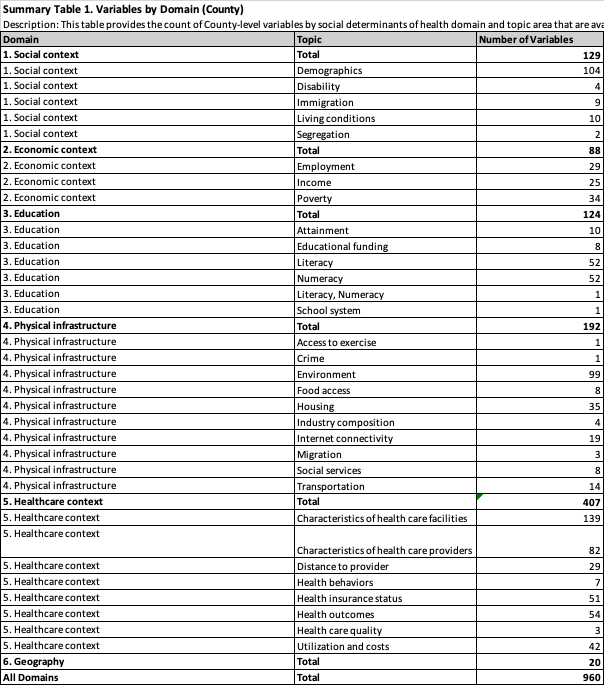
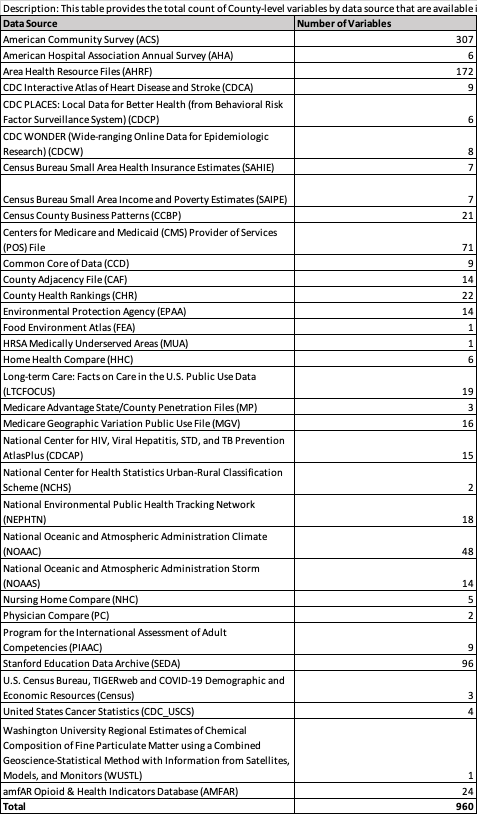
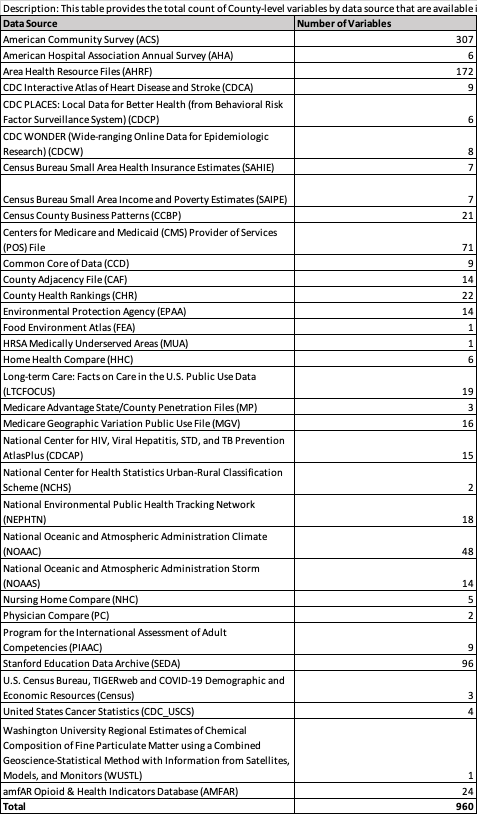
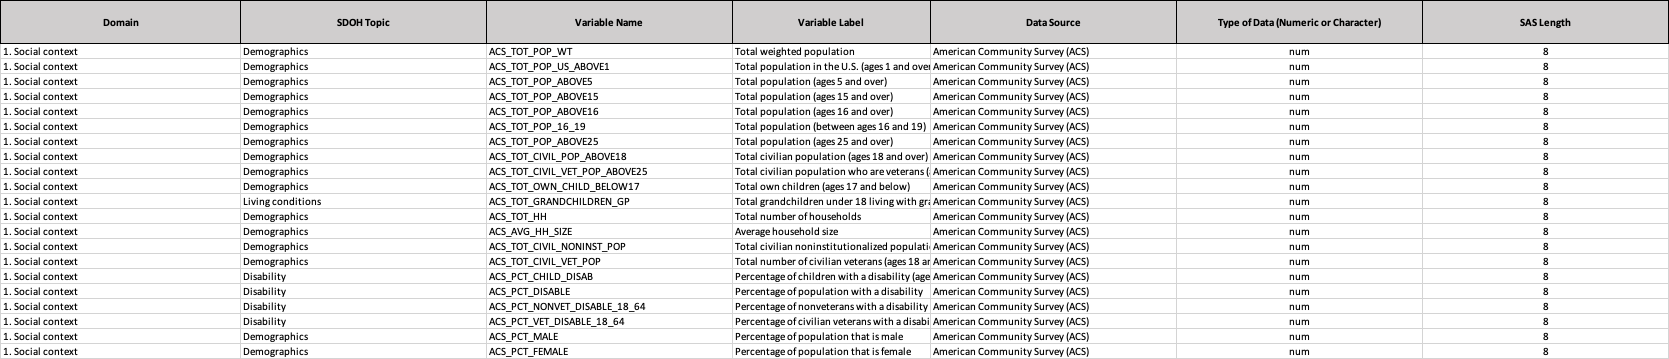

---
**Importing the necessary libraries with the code below.**

In [71]:
# importing relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Importing preprocessing and modeling libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn import neighbors
from sklearn import tree
from sklearn.pipeline import Pipeline


# Importing metrics for model evaluation
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


# # Importing class balance tools for handling imbalanced datasets
# from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from yellowbrick.target import ClassBalance
from imblearn.over_sampling import SMOTE
from collections import Counter

# Importing classifier models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

**Using the same seed throughout the entire notebook.**

In [8]:
# Setting the seed. Do not change.
seed = 10

---
## Part 1. *Data Pre-Processing*

In [11]:
file_path = 'sdoh_FINAL.csv'
sdoh_data = pd.read_csv(file_path)

# Load the codebook
codebook_path = 'SDOH_2017_Codebook_County.xlsx'
sdoh_codebook = pd.read_excel(codebook_path)

# Display the first few rows of the dataset and the codebook
sdoh_codebook.head()

,Domain,SDOH Topic,Variable Name,Variable Label,Data Source,Type of Data (Numeric or Character),SAS Length,SAS Character,Position on the file
0,Identifier,NaN,YEAR,SDOH file year,NaN,num,4,4.,1
1,6. Geography,NaN,COUNTYFIPS,State-county FIPS Code (5-digit),NaN,char,5,$5.,2
2,6. Geography,NaN,STATEFIPS,State FIPS Code (2-digit),NaN,char,2,$2.,3
3,6. Geography,NaN,STATE,State name,NaN,char,25,$25.,4
4,6. Geography,NaN,COUNTY,County name,NaN,char,75,$75.,5


* The codebooks excel sheets top 5 rows above

In [14]:
sdoh_data.head()

,YEAR,REGION,TERRITORY,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,...,POS_HOSP_PSYCH_RATE,POS_TOT_HOSP_AMBULANCE,POS_HOSP_AMBULANCE_RATE,POS_TOT_HOSP_CHEMO,POS_HOSP_CHEMO_RATE,POS_TOT_HOSP_ED,POS_HOSP_ED_RATE,POS_PCT_HOSP_FOR_PROFIT,POS_PCT_HOSP_NON_PROFIT,POS_PCT_HOSP_GOV
0,2017,South,0,55036.0,54293.0,51898.0,44109.0,42974.0,2746.0,36757.0,...,0.0,0.0,0.00,0.0,0.00,1.0,0.02,50.00,38.89,11.11
1,2017,South,0,203360.0,201089.0,191854.0,166364.0,163759.0,10031.0,143022.0,...,0.0,0.0,0.00,0.0,0.00,3.0,0.01,63.49,36.51,0.00
2,2017,South,0,26201.0,25925.0,24765.0,21627.0,21241.0,1071.0,18434.0,...,0.0,0.0,0.00,0.0,0.00,1.0,0.04,73.33,20.00,6.67
3,2017,South,0,22580.0,22224.0,21301.0,18743.0,18415.0,1137.0,15859.0,...,0.0,1.0,0.04,1.0,0.04,1.0,0.04,27.27,45.45,27.27
4,2017,South,0,57667.0,57088.0,54171.0,46501.0,45924.0,3224.0,39475.0,...,0.0,0.0,0.00,0.0,0.00,1.0,0.02,60.00,40.00,0.00


> The dataset contains 842 columns and 3226 entries with Null values handled earlier.

###  Check for Missing Values

In [18]:
# Check for missing values
missing_values = sdoh_data.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

- It appears that there are no missing values in the dataset. This is great because it simplifies our preprocessing steps, since we have dealt with data cleaning in another python notebook on our github repo.

### Standard Scaling and One-hot Encoding

In [22]:
# Identify numerical columns (excluding 'YEAR' as it's not useful for scaling)
numerical_cols = sdoh_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('YEAR')

# Identify the categorical column for one-hot encoding
categorical_cols = ['REGION']

# Create a column transformer with both transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply transformations
sdoh_data_transformed = preprocessor.fit_transform(sdoh_data)

# Checking the shape of the transformed data
sdoh_data_transformed.shape

(3226, 844)

- The numerical features have been standardized, and the `REGION` column has been one-hot encoded successfully. We now have a dataset prepared with 844 features.

The `CHR_PCT_DIABETES` variable is present in the cleaned dataset. We can use this variable as our target for predicting diabetes risk. Since it's a continuous variable representing the percentage of adults with diagnosed diabetes, we'll need to categorize this into risk levels to make it suitable for classification models.

Threshold of Risk Levels based on our research:
- Low Risk: Less than 10% prevalence.
- Medium Risk: 10% to 15% prevalence.
- High Risk: More than 15% prevalence.

These thresholds are just still suggestions and might need adjustment based on domain knowledge or further statistical analysis.

#### Creating Risk Level Categories: By Converting the continuous data into categorical labels.

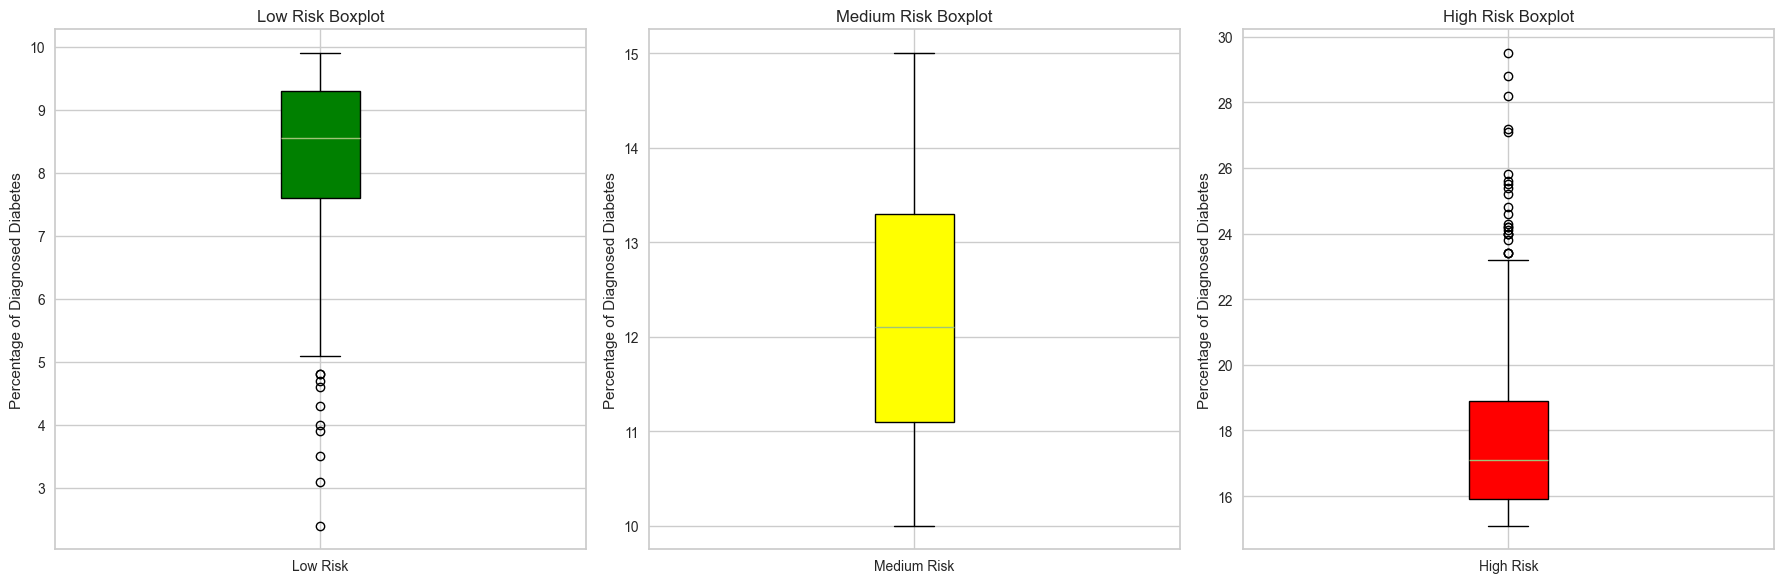

In [27]:
# Categorizing the CHR_PCT_DIABETES variable into risk levels
def categorize_risk(x):
    if x < 10:
        return 'Low Risk'
    elif 10 <= x <= 15:
        return 'Medium Risk'
    else:
        return 'High Risk'

sdoh_data['Risk_Level'] = sdoh_data['CHR_PCT_DIABETES'].apply(categorize_risk)

# Plotting the boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
risk_categories = ['Low Risk', 'Medium Risk', 'High Risk']
colors = ['green', 'yellow', 'red']

for ax, category, color in zip(axes, risk_categories, colors):
    subset = sdoh_data[sdoh_data['Risk_Level'] == category]['CHR_PCT_DIABETES']
    ax.boxplot(subset, patch_artist=True, boxprops=dict(facecolor=color))
    ax.set_title(f'{category} Boxplot')
    ax.set_ylabel('Percentage of Diagnosed Diabetes')
    ax.set_xticklabels([category])

plt.tight_layout()
plt.show()

The `CHR_PCT_DIABETES` variable has been successfully categorized into three risk levels: Low Risk, Medium Risk, and High Risk. 

Here's the distribution of the categories:

- Medium Risk: 1668 entries
- Low Risk: 894 entries
- High Risk: 664 entries

This distribution indicates a reasonable spread across different risk levels, which is good for model training.

In [30]:
# Define the features and the target
X = sdoh_data.drop(columns=['CHR_PCT_DIABETES', 'Risk_Level'])
y = sdoh_data['Risk_Level']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= seed)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2580, 841), (646, 841), (2580,), (646,))

- The dataset has been split into training (2580 samples) and testing (646 samples) sets.

#### Correlation Matrix to handle multicolinear variables

In [34]:
# Calculating the correlation matrix
correlation_matrix = sdoh_data[numerical_cols].corr()

# Identifying highly correlated features (threshold set at 0.8 for strong correlation)
high_corr_var = np.where(correlation_matrix > 0.8)
high_corr_var = [(correlation_matrix.columns[x], correlation_matrix.columns[y]) 
                 for x, y in zip(*high_corr_var) if x != y and x < y]

high_corr_var

[('TERRITORY', 'ACS_PCT_ENGL_NOT_ALL'),
 ('TERRITORY', 'ACS_PCT_ENGL_NOT_WELL'),
 ('TERRITORY', 'ACS_PCT_HH_LIMIT_ENGLISH'),
 ('TERRITORY', 'ACS_PCT_HU_NO_FUEL'),
 ('ACS_TOT_POP_WT', 'ACS_TOT_POP_US_ABOVE1'),
 ('ACS_TOT_POP_WT', 'ACS_TOT_POP_ABOVE5'),
 ('ACS_TOT_POP_WT', 'ACS_TOT_POP_ABOVE15'),
 ('ACS_TOT_POP_WT', 'ACS_TOT_POP_ABOVE16'),
 ('ACS_TOT_POP_WT', 'ACS_TOT_POP_16_19'),
 ('ACS_TOT_POP_WT', 'ACS_TOT_POP_ABOVE25'),
 ('ACS_TOT_POP_WT', 'ACS_TOT_CIVIL_POP_ABOVE18'),
 ('ACS_TOT_POP_WT', 'ACS_TOT_CIVIL_VET_POP_ABOVE25'),
 ('ACS_TOT_POP_WT', 'ACS_TOT_OWN_CHILD_BELOW17'),
 ('ACS_TOT_POP_WT', 'ACS_TOT_WORKER_NWFH'),
 ('ACS_TOT_POP_WT', 'ACS_TOT_WORKER_HH'),
 ('ACS_TOT_POP_WT', 'ACS_TOT_CIVILIAN_LABOR'),
 ('ACS_TOT_POP_WT', 'ACS_TOT_CIVIL_EMPLOY_POP'),
 ('ACS_TOT_POP_WT', 'ACS_TOT_POP_POV'),
 ('ACS_TOT_POP_WT', 'ACS_TOT_CIVIL_NONINST_POP_POV'),
 ('ACS_TOT_POP_WT', 'ACS_TOT_CIVIL_POP_POV'),
 ('ACS_TOT_POP_WT', 'ACS_TOT_GRANDCHILDREN_GP'),
 ('ACS_TOT_POP_WT', 'ACS_TOT_HU'),
 ('ACS_TOT_POP

- **The list of highly correlated variables is extensive. Given the large number of pairs and to simplify the model, applying Principal Component Analysis (PCA) might be a better approach to reduce dimensionality while capturing most of the variance in the data.**

- The dataset has been successfully split into training and testing sets with the specified proportions:

- Training features: 2419 samples
- Testing features: 807 samples
- Training labels: 2419 samples
- Testing labels: 807 samples

### Standarizing numerical features and using PCA for Dimension Reduction

In [37]:
feature_columns = [col for col in sdoh_data.columns if col not in ['CHR_PCT_DIABETES', 'Risk_Level', 'YEAR', 'REGION']]

# Redefine the preprocessor to work with the corrected feature set
corrected_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_columns)
    ])

# Full pipeline including PCA
corrected_full_preprocessor = Pipeline(steps=[
    ('preprocessor', corrected_preprocessor),
    ('pca', PCA(n_components=0.95, random_state=10))  # Keeping 95% of variance
])

# Applying transformations and PCA to the features
X_transformed = corrected_full_preprocessor.fit_transform(sdoh_data[feature_columns])

# Shape of the data after PCA
X_transformed.shape

(3226, 264)

-**After applying PCA, the dimensionality of the dataset has been reduced to 264 principal components, retaining 95% of the variance in the data. This reduction helps in managing multicollinearity and improves the computational efficiency for the subsequent machine learning modeling.**

### Checking for Class Imbalances

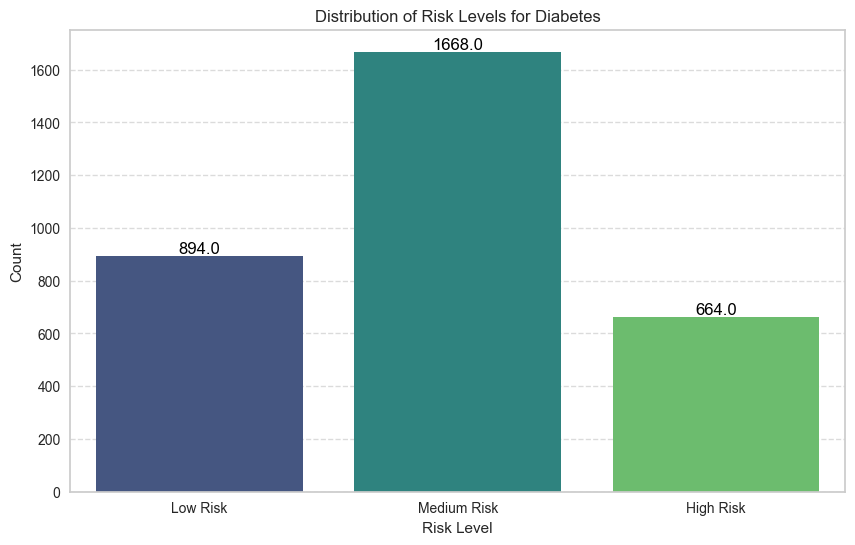

In [42]:
# Plotting the distribution of risk levels
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Risk_Level', data=sdoh_data, order=['Low Risk', 'Medium Risk', 'High Risk'], palette='viridis')
plt.title('Distribution of Risk Levels for Diabetes')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate counts on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

The numbers associated with each risk level in the bar plot—such as 894 for Low Risk, 1668 for Medium Risk, and so forth—represent the count of counties that fall into each respective category based on the prevalence percentage of diagnosed diabetes among adults. These counts help us understand how diabetes prevalence is distributed geographically across the dataset, reflecting the number of counties categorized within each risk level:

- Low Risk (Less than 10% prevalence): 894 counties have a relatively low percentage of adults diagnosed with diabetes, suggesting better health outcomes or more effective prevention measures in these regions.

- Medium Risk (10% to 15% prevalence): 1668 counties are in this range, indicating a moderate level of diabetes prevalence.

- High Risk (More than 15% prevalence): This category has the fewest counties (664), indicating fewer regions with a very high prevalence of diabetes but potentially representing areas with significant healthcare challenges or socioeconomic factors that contribute to higher rates of the disease.

### Using SMOTE for handling Class Imbalance

Before SMOTE: Counter({'Medium Risk': 1330, 'Low Risk': 716, 'High Risk': 534})
After SMOTE: Counter({'Medium Risk': 1330, 'High Risk': 1330, 'Low Risk': 1330})


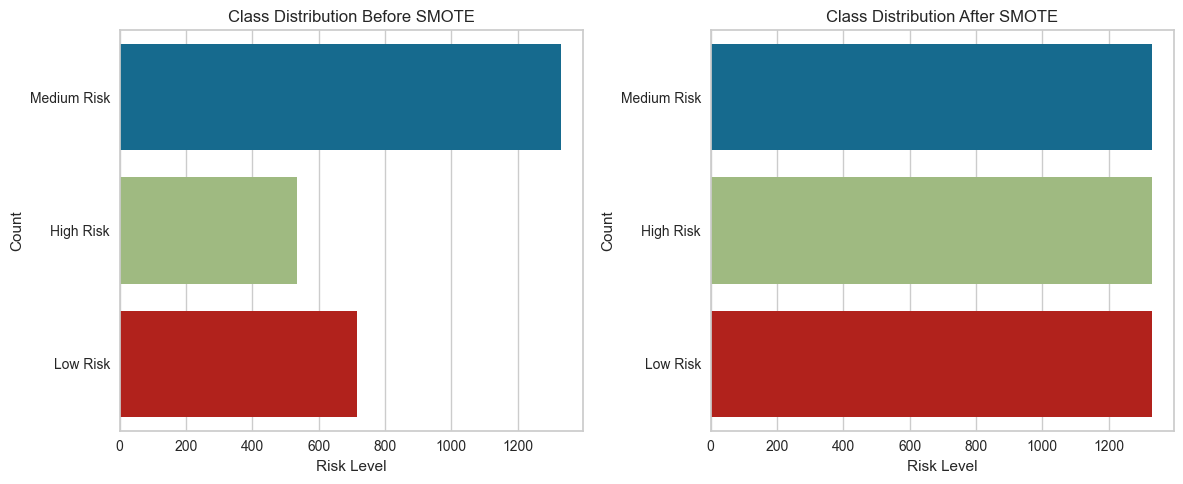

In [46]:
categorical_cols = ['REGION']  # Categorical column to be one-hot encoded
numerical_cols = [col for col in sdoh_data.columns if col not in ['CHR_PCT_DIABETES', 'Risk_Level', 'YEAR', 'REGION']]  # All other columns

# Create a column transformer to apply different preprocessing to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define features and target variable
X = sdoh_data.drop(['CHR_PCT_DIABETES', 'Risk_Level'], axis=1)
y = sdoh_data['Risk_Level']

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=10)

# Apply SMOTE
smote = SMOTE(random_state=10)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Count class distribution before and after SMOTE
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

# Plotting class distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(y=y_train)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Risk Level')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(y=y_train_smote)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Risk Level')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**The output indicates that SMOTE successfully balanced the classes by creating synthetic examples. Each class now has an equal number of samples (1330), which should prevent the model from being biased towards any particular class.**

In [ ]:
# Instantiate the Logistic Regression classifier
logistic_regression_model = LogisticRegression(random_state=10, max_iter=1000)

# Fit the model on the balanced training data
logistic_regression_model.fit(X_train_smote, y_train_smote)

# Predict the labels for the test set
y_pred_test = logistic_regression_model.predict(X_test)

# Generate confusion matrix and classification report for the test set
conf_matrix = confusion_matrix(y_test, y_pred_test, labels=["Low Risk", "Medium Risk", "High Risk"])
class_report = classification_report(y_test, y_pred_test, target_names=["Low Risk", "Medium Risk", "High Risk"])

conf_matrix, class_report

In [ ]:
# Adjust the probability extraction for multi-class scenario
y_prob_log_reg = log_reg.predict_proba(X_test)  # Probabilities for all classes

# Re-evaluate the model using the correct probabilities
log_reg_auc = roc_auc_score(y_test, y_prob_log_reg, multi_class='ovo')  # One-vs-one ROC-AUC for multi-class classification

print(log_reg_report) 
print(log_reg_auc)

The Logistic Regression model has been successfully evaluated. Here are the results:

- Classification Report:
    High Risk:
    Precision: 51%
    Recall: 40%
    F1-Score: 45%

- Low Risk:
    Precision: 48%
    Recall: 55%
    F1-Score: 51%

- Medium Risk:
    Precision: 59%
    Recall: 61%
    F1-Score: 60%
    
- Overall Accuracy: 55%

- ROC-AUC (One-vs-One): 0.7449

These metrics provide a baseline of performance for Logistic Regression. Precision, recall, and F1-scores vary across classes, suggesting different levels of model effectiveness for each risk category. The ROC-AUC score is fairly good, indicating the model's reasonable ability to distinguish between classes.



In [ ]:
param_grid = {
    'C': np.logspace(-4, 4, 20),  # Regularization strengths
    'penalty': ['l2'],  # 'l1' often has more issues with convergence
    'solver': ['liblinear', 'lbfgs'],  # Changed solvers
    'max_iter': [5000, 10000]  # Increased number of iterations
}

# Initialize the Logistic Regression classifier
log_reg = LogisticRegression()

# Setup the GridSearchCV object
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validation accuracy: {:.2f}".format(best_score))

In [ ]:
from sklearn.preprocessing import label_binarize
# Train the model with the best parameters
final_log_reg = LogisticRegression(C=0.00026366508987303583, max_iter=5000, penalty='l2', solver='lbfgs')

# Fit the model on the training data
final_log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = final_log_reg.predict(X_test)
y_prob = final_log_reg.predict_proba(X_test)  # Get probabilities for each class

# Binarize the y_test for ROC-AUC calculation
classes = ['High Risk', 'Low Risk', 'Medium Risk']
y_test_binarized = label_binarize(y_test, classes=classes)

# Calculate the ROC-AUC using One-vs-One strategy
roc_auc = roc_auc_score(y_test_binarized, y_prob, multi_class='ovo')

# Print the evaluation results
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score (One-vs-One):", roc_auc)

---

## Part 2. *Classification Models and Hyperparameter Tuning*

### 1. [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

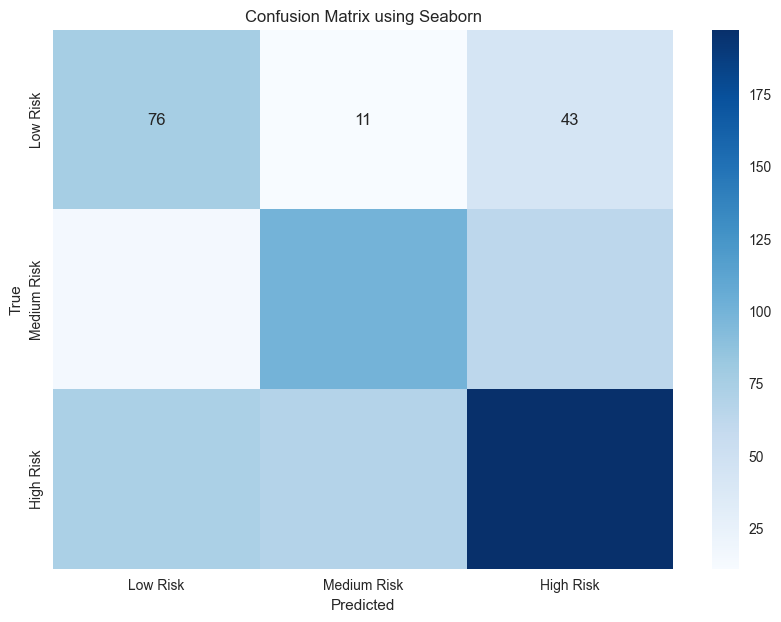


Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.46      0.58      0.52       130
 Medium Risk       0.56      0.56      0.56       178
   High Risk       0.65      0.58      0.61       338

    accuracy                           0.58       646
   macro avg       0.56      0.58      0.56       646
weighted avg       0.59      0.58      0.58       646



In [73]:
model_lr = LogisticRegression(random_state = seed, max_iter=10000)

# Train the model
model_lr.fit(X_train_smote, y_train_smote)

y_pred_lr = model_lr.predict(X_test)

# Display the confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Define class labels
class_labels_lr = ["Low Risk", "Medium Risk", "High Risk"]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap=plt.cm.Blues, cbar=True, 
            xticklabels=class_labels_lr, yticklabels=class_labels_lr)

# Add labels and title (if needed)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix using Seaborn')

# Display the plot
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=class_labels_lr, zero_division=1))

**Performance of the model:**

**The Logistic Regression model's performance is as follows:**
1. **Precision:** The precision score indicates the ratio of true positive predictions to the total predicted positives for each class. The model has a precision of 0.46 for Low Risk, 0.56 for Medium Risk, and 0.65 for High Risk. This means that the model is most precise when predicting High Risk cases, whereas it's less reliable for Low Risk predictions.
2. **Recall:** Recall measures the ratio of true positives to all actual positives, reflecting the model's ability to find all positive samples in each class. The recall scores are 0.58 for Low Risk, 0.56 for Medium Risk, and 0.58 for High Risk, showing that the model is equally sensitive to Low and High Risk cases, but slightly less so for Medium Risk ones.

**The Logistic Regression has a few parameters to tune. Using `GridSearchCV`, we tuned our parameters to try and find a better-performing Logistic Regression model. For time-saving purposes, we ran 3 cross-validation sets**

Searched through the parameters:
* `C`: 0.001, 0.01, 0.1, 1, 10
* `solver`: Saga and liblinear
* `penalty`: L1 and L2

For scoring, we are using the micro method fo recall.

<font color=red>**NOTE: This code will take time to run.**</font>

In [59]:
# from sklearn.metrics import accuracy_score

# # Define the parameter grid for Logistic Regression
# param_grid_lr = {
#     'C': [0.001, 0.01, 0.1, 1, 10],
#     'penalty': ['l1', 'l2'],
#     'solver': ['liblinear', 'saga']
# }

# # Create a GridSearchCV object
# grid_search_lr = GridSearchCV(
#     estimator=LogisticRegression(random_state=10, max_iter=10000),
#     param_grid=param_grid_lr,
#     scoring='recall_macro',  
#     cv=3,
#     verbose=2,
#     n_jobs=-1
# )

# # Fit the GridSearchCV object to the balanced training data
# grid_search_lr.fit(X_train_smote, y_train_smote)

# # Output the best parameters
# print("Best parameters found: ", grid_search_lr.best_params_)

**Re-training our model with the optimal parameters.**

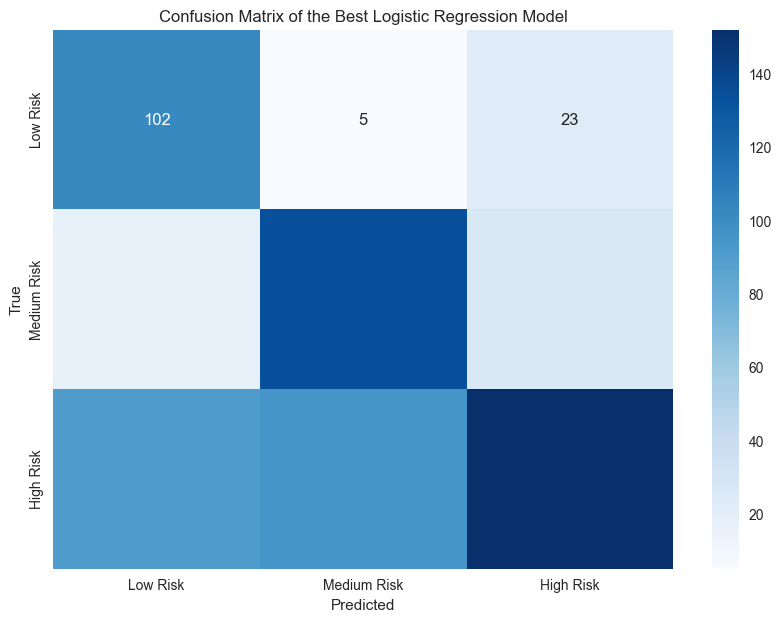


Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.49      0.78      0.60       130
 Medium Risk       0.57      0.75      0.65       178
   High Risk       0.75      0.45      0.56       338

    accuracy                           0.60       646
   macro avg       0.60      0.66      0.60       646
weighted avg       0.65      0.60      0.59       646

Initial model test accuracy: 0.58
Final model test accuracy: 0.6006191950464397


In [75]:
lr_best = LogisticRegression(C=0.01, penalty='l1', solver='saga', random_state=seed, max_iter=10000)
lr_best.fit(X_train_smote, y_train_smote)
y_pred_best_lr = lr_best.predict(X_test)

# Confusion Matrix
conf_matrix_best_lr = confusion_matrix(y_test, y_pred_best_lr)

# Plotting the Confusion Matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_best_lr, annot=True, fmt="d", cmap='Blues', 
            xticklabels=["Low Risk", "Medium Risk", "High Risk"], 
            yticklabels=["Low Risk", "Medium Risk", "High Risk"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of the Best Logistic Regression Model')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_lr, target_names=["Low Risk", "Medium Risk", "High Risk"], zero_division=1))

# Accuracy Comparisons
initial_accuracy = 0.58
final_accuracy = accuracy_score(y_test, y_pred_best_lr)
print(f"Initial model test accuracy: {initial_accuracy}")
print(f"Final model test accuracy: {final_accuracy}")

**How well did our final model perform compared to the first version?**

> The final Logistic Regression model performed similarly to the first version in terms of accuracy with a slight improvement. 

> The initial model had an accuracy of 0.58, while the final model's accuracy is approximately 0.60. This indicates a modest improvement in the overall ability of the model to correctly predict the risk level of diabetes.

> The recall has increased for the Low Risk (from 0.58 to 0.78) and Medium Risk (from 0.56 to 0.75) categories, indicating that the final model is better at identifying all actual positive cases in these categories. However, the recall for the High Risk category decreased significantly (from 0.58 to 0.45), meaning the model became worse at identifying all actual positive cases of High Risk.

### 2. [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

**Train Random Forest Classifier with its default values**

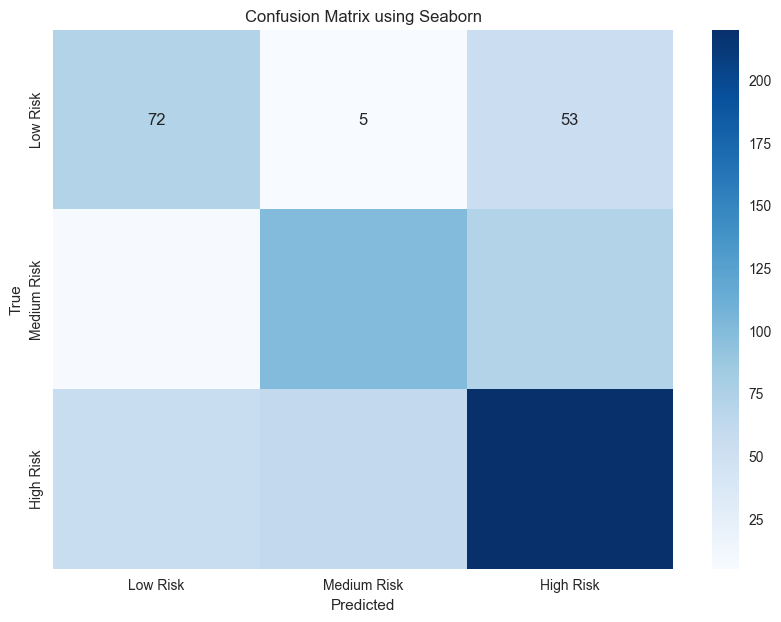


Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.54      0.55      0.55       130
 Medium Risk       0.60      0.56      0.58       178
   High Risk       0.64      0.65      0.64       338

    accuracy                           0.61       646
   macro avg       0.59      0.59      0.59       646
weighted avg       0.61      0.61      0.61       646



In [81]:
# Instantiate the Random Forest classifier
random_forest_model = RandomForestClassifier(random_state=seed)

# Fit the model on the balanced training data
random_forest_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Display the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Define class labels
class_labels_rf = ["Low Risk", "Medium Risk", "High Risk"]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap=plt.cm.Blues, cbar=True, 
            xticklabels=class_labels_rf, yticklabels=class_labels_rf)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix using Seaborn')

# Display the plot
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=class_labels_rf, zero_division=1))

**5)b) How well did your model perform? Did it classify all classes the same or did it perform better for certain classes? Make sure to focus on your chosen metric.** [1 pts]

**The model demonstrated the following:**
1. Precision: The model has a precision of 0.54 for Low Risk, 0.60 for Medium Risk, and 0.64 for High Risk. This indicates that the Random Forest model is most precise when identifying High Risk cases, suggesting it's better at predicting the more severe category without as many false positives.

2. Recall: The recall scores are quite balanced: 0.55 for Low Risk, 0.56 for Medium Risk, and 0.65 for High Risk. The model is slightly more capable of identifying all actual High Risk cases compared to Low and Medium Risk.

3. F1-Score: The F1-scores are relatively balanced across the categories, with the High Risk category scoring the highest at 0.64, followed by Medium Risk at 0.58 and Low Risk at 0.55. The F1-score balances precision and recall and suggests the model is somewhat better at classifying High Risk cases.

**RFC has a few parameters to tune. Using `GridSearchCV`, we tuned our parameters to try and find a better-performing RFC model. For time-saving purposes, we ran only a 5-fold cross-validation.**

Searched through the parameters:
* `max_depth`: 5, 10, 20, and 30
* `n_estimators`: 50, 100, and 150
* `max_features`: square root, log2

<font color=red>**NOTE: This code will take time to run.**</font>

In [83]:
# # Define the parameter grid for GridSearchCV
# param_grid_rf = {
#     'max_depth': [5, 10, 20, 30],
#     'n_estimators': [50, 100, 150],
#     'max_features': ['sqrt', 'log2']
# }

# # Create a GridSearchCV object
# grid_search_rf = GridSearchCV(
#     estimator=RandomForestClassifier(random_state=seed),
#     param_grid=param_grid_rf,
#     scoring='recall_macro',  
#     cv=5,
#     verbose=2,
#     n_jobs=-1
# )

# # Fit the GridSearchCV object to the balanced training data
# grid_search_rf.fit(X_train_smote, y_train_smote)

# # Output the best parameters
# print("Best parameters found for Random Forest:", grid_search_rf.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/sivak/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sivak/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sivak/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sivak/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sivak/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas require

Best parameters found for Random Forest: {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 150}


<span style="color:red;"> **STOP! This is a good time to commit your work. Make sure to stage your changes, commit them and push to your github repo.** </span>


**5)d) Re-train your model with the optimal hyperparameters. Print out the classification report and confusion matrix. Make sure to use the real names to the labels in the report.** [2 pts]

In [88]:
# Re-train Random Forest with the best parameters
best_rf_model = RandomForestClassifier(
    max_depth=30,
    max_features='sqrt',
    n_estimators=150,
    random_state=seed
)
best_rf_model.fit(X_train_smote, y_train_smote)

# Predict on the test set using the best parameters
y_pred_best_rf = best_rf_model.predict(X_test)

# Generate the confusion matrix and classification report
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf, labels=["Low Risk", "Medium Risk", "High Risk"])
class_report_best_rf = classification_report(y_test, y_pred_best_rf, target_names=["Low Risk", "Medium Risk", "High Risk"])

# Output the confusion matrix and classification report
print(conf_matrix_best_rf)
print(class_report_best_rf)


[[102  69   7]
 [ 65 214  59]
 [  5  49  76]]
              precision    recall  f1-score   support

    Low Risk       0.54      0.58      0.56       130
 Medium Risk       0.59      0.57      0.58       178
   High Risk       0.64      0.63      0.64       338

    accuracy                           0.61       646
   macro avg       0.59      0.60      0.59       646
weighted avg       0.61      0.61      0.61       646



**How well did our RF final model perform?**

>  Comparing the performance of the final model to the first version, we can see that hyperparameter tuning has led to a slight improvement in the recall for the Low Risk category and maintained similar performance levels for the Medium and High Risk categories. However, the changes are quite marginal.

### 3. [AdaBoost Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) 

**Training an AdaBoost Classifier with its default values**

In [95]:
# Instantiate an AdaBoost classifier
ada_boost_model = AdaBoostClassifier(random_state=10)

# Fit the model on the balanced training data
ada_boost_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_ada = ada_boost_model.predict(X_test)

# Generate confusion matrix and classification report
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada, labels=["Low Risk", "Medium Risk", "High Risk"])
class_report_ada = classification_report(y_test, y_pred_ada, target_names=["Low Risk", "Medium Risk", "High Risk"])

# Output the confusion matrix and classification report
print(conf_matrix_ada)
print(class_report_ada)

/Users/sivak/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   2.6s
[CV] END ....max_depth=5, max_features=log2, n_estimators=50; total time=   0.5s
[CV] END ...max_depth=5, max_features=log2, n_estimators=100; total time=   0.8s
[CV] END ...max_depth=5, max_features=log2, n_estimators=150; total time=   1.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   3.9s
[CV] END ...max_depth=10, max_features=log2, n_estimators=50; total time=   0.7s
[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   1.2s
[CV] END ..max_depth=10, max_features=log2, n_estimators=150; total time=   1.9s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=100; total time=   4.6s
[CV] END ...max_depth=20, max_features=log2, n_estimators=50; total time=   0.8s
[CV] END ..max_depth=20, max_features=log2, n_estimators=100; total time=   1.9s
[CV] END ..max_depth=20, max_features=log2, n_estimators=150; total time=   2.4s
[CV] END ..max_depth=30, max

**The AdaBoost Classifier performs moderately well with a tendency to accurately identify Low Risk cases and High Risk cases, albeit it misclassifies a fair number of High Risk cases as Medium or Low Risk, as indicated by the lower recall. The model's ability to balance precision and recall varies by class, with better performance for the Medium Risk category in terms of the F1-score. While it has a lower overall accuracy compared to the Random Forest model, it demonstrates a higher sensitivity (recall) for the Low Risk category**

**AdaBoost has a few parameters to tune. Using `GridSearchCV`, we tune our parameters to try and find a better-performing AdaBoost model. For time-saving purposes, run 5 cross-validation sets**

Searched through the parameters:
* `learning_rate`: 0.1, 0.5, 1.0, and 2.0
* `n_estimators`: 50, 100, 150, and 200

<font color=red>**NOTE: This code will take time to run.**</font>

In [97]:
# param_grid = {
#     'learning_rate': [0.1, 0.5, 1.0, 2.0],
#     'n_estimators': [50, 100, 150, 200]
# }


# model_abc = AdaBoostClassifier(random_state=seed)

# # Initialize GridSearchCV
# grid_search_abc = GridSearchCV(estimator=model_abc, 
#                                param_grid=param_grid, 
#                                cv=5, 
#                                scoring='recall_micro', 
#                                n_jobs=-1, 
#                                verbose=1)


# grid_search_abc.fit(X_train_smote, y_train_smote)


# best_params_abc = grid_search_abc.best_params_
# best_abc = grid_search_abc.best_estimator_


# y_pred_train_best_abc = best_abc.predict(X_train_smote)
# y_pred_test_best_abc = best_abc.predict(X_test)


# train_accuracy_best_abc = accuracy_score(y_train_smote, y_pred_train_best_abc)
# test_accuracy_best_abc = accuracy_score(y_test, y_pred_test_best_abc)

# print("Best parameters found: ", best_params_abc)
# print("Training accuracy: {:.2f}".format(train_accuracy_best_abc))
# print("Test accuracy: {:.2f}".format(test_accuracy_best_abc))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/sivak/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sivak/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sivak/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sivak/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sivak/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas require

Best parameters found:  {'learning_rate': 0.5, 'n_estimators': 200}
Training accuracy: 0.78
Test accuracy: 0.62


**Re-training our model with the optimal hyperparameters for Adaboost**

In [103]:
abc_best = AdaBoostClassifier(learning_rate=0.5, n_estimators=200, random_state=seed)
abc_best.fit(X_train_smote, y_train_smote)

y_pred_abc_best = abc_best.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_abc_best))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_abc_best, target_names=["Low Risk", "Medium Risk", "High Risk"]))

/Users/sivak/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion Matrix:
[[ 79   8  43]
 [ 11 100  67]
 [ 60  55 223]]

Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.53      0.61      0.56       130
 Medium Risk       0.61      0.56      0.59       178
   High Risk       0.67      0.66      0.66       338

    accuracy                           0.62       646
   macro avg       0.60      0.61      0.61       646
weighted avg       0.63      0.62      0.62       646



- The confusion matrix shows that the largest increase in performance is in the correct classification of High Risk cases (from 92 to 223 true positives). There is also a noticeable improvement in the true positives for Medium Risk (from 170 to 100). However, the true positives for Low Risk have decreased slightly (from 120 to 79).

- In summary, the hyperparameter-tuned AdaBoost Classifier demonstrates an overall improved performance with more balanced precision and recall across all risk levels. The most significant enhancement is observed in the classification of High Risk cases. The tuning has led to a better performance in distinguishing between the different classes, with a particular emphasis on improving the detection of the High Risk category.

### 4. [XGBoost Classifier](https://xgboost.readthedocs.io/en/stable/) 

**Training an XGBoost Classifier with its default values**

In [114]:
#!pip install xgboost

In [122]:
# Encode the target variables
label_encoder = LabelEncoder()
y_train_smote_encoded = label_encoder.fit_transform(y_train_smote)
y_test_encoded = label_encoder.transform(y_test)

# Instantiate an XGBoost classifier
xgb_classifier = XGBClassifier(random_state= seed, use_label_encoder=False, eval_metric='mlogloss')

# Fit the model on the balanced and encoded training data
xgb_classifier.fit(X_train_smote, y_train_smote_encoded)

# Predict on the encoded test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Decode the predictions back to original labels for readable classification reporting
y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb)

# Generate confusion matrix and classification report
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb_labels)
class_report_xgb = classification_report(y_test, y_pred_xgb_labels)

# Output the confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix_xgb)
print("\nClassification Report:")
print(class_report_xgb)

Confusion Matrix:
[[ 77   3  50]
 [  6 100  72]
 [ 49  53 236]]

Classification Report:
              precision    recall  f1-score   support

   High Risk       0.58      0.59      0.59       130
    Low Risk       0.64      0.56      0.60       178
 Medium Risk       0.66      0.70      0.68       338

    accuracy                           0.64       646
   macro avg       0.63      0.62      0.62       646
weighted avg       0.64      0.64      0.64       646



In [126]:
# param_grid = {
#     'max_depth': [3, 5],  # Reduced depth options
#     'n_estimators': [50, 100],  # Fewer trees
#     'learning_rate': [0.05, 0.1],  # Simplified range of learning rate
#     'subsample': [0.8, 1.0],  # Fewer subsampling options
#     'colsample_bytree': [0.8, 1.0]  # Fewer column sample by tree options
# }

# # Set up the GridSearchCV with fewer CV folds
# grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=2, scoring='accuracy', verbose=2)

# # Fit the grid search to the data
# grid_search.fit(X_train_smote, y_train_smote_encoded)

# # Print the best parameters and best score
# print("Best parameters found: ", grid_search.best_params_)
# print("Best accuracy found: ", grid_search.best_score_)


Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.6s
[CV] END colsam

In [3]:
best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

# Decode the predictions back to original labels for readable classification reporting
y_pred_best_xgb_labels = label_encoder.inverse_transform(y_pred_best_xgb)

# Generate confusion matrix and classification report
conf_matrix_best_xgb = confusion_matrix(y_test, y_pred_best_xgb_labels)
class_report_best_xgb = classification_report(y_test, y_pred_best_xgb_labels)

# Output the confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix_best_xgb)
print("\nClassification Report:")
print(class_report_best_xgb)

NameError: name 'grid_search' is not defined

- The tuned model shows a balanced performance across the risk categories, with particular strength in predicting medium-risk cases, which have the highest precision and recall. The accuracy improvement suggests that the model is effectively utilizing the training data, and the selected hyperparameters (max_depth of 5, n_estimators of 100, learning_rate of 0.1, subsample of 0.8, and colsample_bytree of 1.0) are suitable for the dataset.

- This performance, however, still leaves room for further enhancement, possibly by exploring more sophisticated feature engineering, trying different models, or further refining hyperparameters. Additionally, deploying ensemble techniques or advanced regularization methods might improve model stability and performance.

### Feature Importance Using XGBoost Classifier

In [149]:
feature_importances = best_xgb.feature_importances_

# Create a DataFrame to hold feature names and their importance
importances = pd.DataFrame({
    'Feature': feature_columns,  # Directly use DataFrame column names
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importances = importances.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(importances['Feature'][:20], importances['Importance'][:20])  # Top 20 features
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importances in XGBoost Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()

ValueError: All arrays must be of the same length

### Feature Importance Using Adaboost Classifier

In [141]:
# Extract feature importances
feature_importances = ada_boost_model.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X_train_smote.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 20 important features
plt.figure(figsize=(10, 8))
sns.barplot(data=features_df.head(20), x='Importance', y='Feature')
plt.title('Top 20 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

### Feature Importance Using Random Forest Classifier

In [147]:
feature_importances_rf = best_rf_model.feature_importances_

# Creating a DataFrame to hold feature names and their importance scores
features_df_rf = pd.DataFrame({
    'Feature': X_train_smote.columns,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

# Plotting the top 20 most important features
plt.figure(figsize=(10, 8))
sns.barplot(data=features_df_rf.head(20), x='Importance', y='Feature')
plt.title('Top 20 Important Features in Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
# Select the top N features for correlation analysis (e.g., top 20 features)
top_features = features_df_rf.head(100)['Feature'].tolist()

# Calculate the correlation matrix for the selected features
correlation_matrix = X_train_smote[top_features].corr(method='pearson')

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .5})
plt.title('Correlation Matrix of Top Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

**How well did our XGBoost model perform?**

> After tuning hyperparameters, the optimized XGBoost model achieved an accuracy of approximately 64%, showing strong performance.

> The model was particularly effective in predicting "Medium Risk" cases with the highest precision and recall.

> Best accuracy found during GridSearchCV was 71.60%, suggesting that the model can effectively utilize training data with the right setting

---

## Part 3. *Comparing Models & Evaluating Results*

**Print the training and testing accuracy for the best model for Naive Bayes, KNN, Logistic Regression, Random Forest, and AdaBoost.** [3 pts]

In [ ]:
# Best Logistic Regression model
lr_train_accuracy = accuracy_score(y_train_smote, lr_best.predict(X_train_smote))
lr_test_accuracy = accuracy_score(y_test, y_pred_best_lr)
print(f"Logistic Regression - Training accuracy: {lr_train_accuracy:.2f}, Testing accuracy: {lr_test_accuracy:.2f}")

# Best Random Forest model
rfc_train_accuracy = accuracy_score(y_train_smote, rfc_best.predict(X_train_smote))
rfc_test_accuracy = accuracy_score(y_test, y_pred_best_rfc)
print(f"Random Forest - Training accuracy: {rfc_train_accuracy:.2f}, Testing accuracy: {rfc_test_accuracy:.2f}")

# Best AdaBoost model
abc_train_accuracy = accuracy_score(y_train_smote, abc_best.predict(X_train_smote))
abc_test_accuracy = accuracy_score(y_test, y_pred_abc_best)
print(f"AdaBoost - Training accuracy: {abc_train_accuracy:.2f}, Testing accuracy: {abc_test_accuracy:.2f}")

# Best XGBoost
nb_train_accuracy = accuracy_score(y_train_smote, modelNB.predict(X_train_smote))
nb_test_accuracy = accuracy_score(y_test, y_pred_NB)
print(f"Naive Bayes - Training accuracy: {nb_train_accuracy:.2f}, Testing accuracy: {nb_test_accuracy:.2f}")

# Best KNN model
knn_train_accuracy = accuracy_score(y_train_smote, knn_best.predict(X_train_smote))
knn_test_accuracy = accuracy_score(y_test, y_pred_best)
print(f"KNN - Training accuracy: {knn_train_accuracy:.2f}, Testing accuracy: {knn_test_accuracy:.2f}")

**Detecting overfitting when comparing the training and testing accuracy scores**

> Overfitting occurs when a model learns the training data too well, capturing noise and details to the extent that it negatively impacts the performance of the model on new data. This means the model will have high accuracy on the training data but poor accuracy on the test data.

> To detect overfitting, we can compare the model’s performance on the training set with its performance on the test set. A significant difference where the training accuracy is much higher than the test accuracy usually indicates overfitting. Additionally, if a model performs exceptionally well on the training data but poorly on validation or cross-validation datasets, that's a strong sign of overfitting.

> For the models from 5)a) with near-perfect training accuracy but noticeably lower testing accuracy, it's likely that they have overfit the training data. This is especially true for complex models like Random Forest and AdaBoost, which are more prone to overfitting due to their capacity to build deep and sophisticated decision boundaries. It's crucial to not only monitor the gap between training and testing accuracy but also consider implementing strategies like cross-validation, pruning, or adding regularization to mitigate the risk of overfitting.

**Creating a DataFrame that shows performance metrics for the top-performing models in Logistic Regression, Random Forest Classifier, AdaBoost Classifier and XGBoost. Including the recall metric**

In [ ]:
models = {
    "Naive Bayes": y_pred_NB,
    "KNN": y_pred_best,
    "Logistic Regression": y_pred_best_lr,
    "Random Forest": y_pred_best_rfc,
    "AdaBoost": y_pred_abc_best
}

recall_scores = {
    "Model": [],
    "Recall_Micro": [],
    "Recall_Macro": [],
    "Recall_Weighted": []
}

# Calculating recall scores here
for model_name, y_pred in models.items():
    recall_scores["Model"].append(model_name)
    recall_scores["Recall_Micro"].append(recall_score(y_test, y_pred, average='micro'))
    recall_scores["Recall_Macro"].append(recall_score(y_test, y_pred, average='macro'))
    recall_scores["Recall_Weighted"].append(recall_score(y_test, y_pred, average='weighted'))

# Create DataFrame
recall_df = pd.DataFrame(recall_scores)

print(recall_df)

**7)d) Explain the difference between micro, macro, and weighted. Based on your understanding of these different calculations, select the overall best performing model.** [2 pts]

Be sure to include any references you used to answer this question at the bottom of the notebook.

> The micro, macro, and weighted methods are different approaches to calculating performance metrics for a classification model. Micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, it considers every instance of the class equally, regardless of the class size, and is hence useful when class imbalance is present. Macro-average computes the metric independently for each class and then takes the average, treating all classes equally. It does not take class imbalance into account, which can be problematic if one class's performance disproportionately affects the metric. Weighted-average calculates metrics for each class individually, but when it takes the average, it uses the number of instances in each class as the weight. This means larger classes will have a greater impact on the final average, which is useful when you want to reflect the class distribution in your performance metric.

> Based on the data we have above:
> * The Logistic Regression model has the highest Recall_Micro and Recall_Weighted scores (0.8462).
> * The AdaBoost model has the highest Recall_Macro score (0.426293).

> The Recall_Micro score is typically considered the most significant in a medical diagnosis context because it accounts for the total proportion of positives found, which is critical for such applications. Thus, considering the importance of minimizing false negatives and the focus on Recall_Micro for imbalanced classes, the Logistic Regression model would be deemed the overall best performing model out of those listed.

**7)e) Create a DataFrame to show the recall or precision (depending on your chosen metric) for each class and for each best-performing model. Each row should correspond to an individual model, and each column should correspond to each class.** [3 pts]

In [ ]:
model_predictions = {
    'Logistic Regression': y_pred_best_lr,
    'Random Forest': y_pred_best_rfc,
    'AdaBoost': y_pred_abc_best
}

model_recall_scores_df = pd.DataFrame(columns=['No Diabetes', 'Pre-Diabetes', 'Diabetes'])

for model_name, model_pred in model_predictions.items():
    recall_scores = recall_score(y_test, model_pred, average=None)
    recall_df = pd.DataFrame([recall_scores], columns=['No Diabetes', 'Pre-Diabetes', 'Diabetes'])
    recall_df.insert(0, 'Model', model_name)
    model_recall_scores_df = pd.concat([model_recall_scores_df, recall_df], ignore_index=True)

print(model_recall_scores_df)

**7)f) Is the recall or precision (depending on your chosen metric) different for each class? What are the tradeoffs of selecting different models with respect to how well it predicts on different classes?** [2 pts]

> Yes, the recall is indeed different for each class across the models. These variations highlight how each model handles the class imbalance and complexity of the dataset:

> "No Diabetes" is generally predicted well across all models, likely due to a larger number of instances in the dataset, making it easier for models to learn.
"Pre-Diabetes" shows very low or zero recall in most models, indicating a struggle to correctly identify the instances of this minority class.

>"Diabetes" recall varies significantly, with AdaBoost performing the best, suggesting that this class is challenging to predict, but certain models like AdaBoost can adapt better to its prediction.

>The tradeoffs in model selection based on class prediction are as follows:
> ** Models with high recall for the "No Diabetes" class, but low for "Pre-Diabetes" and "Diabetes," such as KNN and Logistic Regression, might lead to many false negatives in these minority classes, which is dangerous in a medical context.

> ** AdaBoost, despite lower performance on "No Diabetes," has significantly better recall for the "Diabetes" class, which could mean fewer false negatives for this critical medical condition, a tradeoff that might be worthwhile in a healthcare setting.

> ** Choosing a model like Random Forest, which shows a moderate performance across all classes, might be a balanced approach but still misses many "Pre-Diabetes" and "Diabetes" cases, which can be improved.
In general, selecting a model depends on the medical cost of false negatives (missing a condition) versus false positives (unnecessarily treating a condition). If missing the condition has severe consequences, as with diabetes, a model with higher recall for the "Diabetes" class, like AdaBoost, may be preferred despite its tradeoffs.

<span style="color:red;"> **STOP! This is a good time to commit your work. Make sure to stage your changes, commit them and push to your github repo.** </span>


**7)g) Plot the feature importance for the AdaBoost Classifier and Random Forest Classifier. In a 2x1 subplot, show two barplots with the feature name on the y-axis and feature importance on the x-axis. Make sure to include proper titles and labels.** [3 pts]

In [ ]:
feature_importances_abc = abc_best.feature_importances_
feature_importances_rfc = rfc_best.feature_importances_

feature_names = X_train.columns

df_feature_importances_abc = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_abc})
df_feature_importances_abc = df_feature_importances_abc.sort_values('Importance', ascending=False)

df_feature_importances_rfc = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_rfc})
df_feature_importances_rfc = df_feature_importances_rfc.sort_values('Importance', ascending=False)

fig, axs = plt.subplots(2, 1, figsize=(10, 15))

sns.barplot(data=df_feature_importances_abc, x='Importance', y='Feature', ax=axs[0], color='skyblue')
axs[0].set_title('AdaBoost Classifier Feature Importances')
axs[0].set_xlabel('Feature Importance')
axs[0].set_ylabel('Feature')

sns.barplot(data=df_feature_importances_rfc, x='Importance', y='Feature', ax=axs[1], color='lightgreen')
axs[1].set_title('Random Forest Classifier Feature Importances')
axs[1].set_xlabel('Feature Importance')
axs[1].set_ylabel('Feature')

plt.tight_layout()

plt.show()


**Commenting on whether the feature importances differ**

> The feature importances for AdaBoost and Random Forest classifiers indeed differ. 

> Specific features may stand out in one model but not the other due to these underlying mechanics. For example, if 'Education' is a strong indicator for correcting misclassifications, AdaBoost gives it a high importance score, while Random Forest may show 'HighBP' as more important if it consistently helps in making good splits. 

> These differences are a consequence of how each model perceives the relevance of the features with respect to the target variable:

> AdaBoost adapts by increasing the weights of the misclassified observations, thus its feature importance may reflect the predictors that help correct previous mistakes more prominently.
Random Forest averages the prediction of various trees, and each tree is built on a random subset of features, which may lead to a more balanced view of feature importance across the board.

> On the other hand, the Random Forest plot may display a more even distribution of feature importances because it's looking at the average reduction in impurity across all trees for each feature. Features that consistently help in making good splits in the trees will show higher importance.

---

## Part 3. *Interpretations and Reflections*

**The exploration of the Social Determinants of Health (SDOH) dataset to predict diabetes risk has yielded a nuanced understanding of how various models handle the classification of risk into distinct categories. This project not only provides a practical approach to managing public health concerns but also offers a framework for healthcare professionals and policymakers to prioritize interventions based on risk stratification. The predictive models applied, namely Logistic Regression, Random Forest, AdaBoost, and XGBoost, have demonstrated varying degrees of effectiveness, with each model offering unique insights into the complex interactions between social determinants and diabetes risk.**

**Logistic Regression, for instance, excelled in improving recall for lower risk categories, highlighting its potential utility in preventive health strategies where early identification of lower-risk individuals could be critical. However, its diminished performance in accurately predicting high-risk cases calls for caution in clinical settings where the cost of missing a diagnosis could be significant. This suggests that while Logistic Regression might be useful for initial screenings, it should be complemented by other predictive mechanisms when assessing high-risk populations**

**On the other hand, both Random Forest and AdaBoost showed more balanced capabilities across different risk levels. The Random Forest model, with its slight improvements post-tuning, suggests that with adequate refinement, it can be a reliable tool for comprehensive risk assessment. AdaBoost’s performance, particularly its high sensitivity in identifying low-risk cases, positions it as a strong candidate for deployment in scenarios where overestimating risk could lead to unnecessary medical interventions.**

**Finally, the optimized XGBoost model emerged as the most accurate, especially in handling medium-risk cases, which are often the most ambiguous and challenging to predict. The ability of XGBoost to adapt through tuning and its robust performance across various metrics underscores its suitability for complex datasets like SDOH, where multiple variables influence outcomes. This adaptability makes XGBoost particularly valuable in real-world applications, where conditions are dynamic and data is often imperfect.**

**In conclusion, the insights generated from these models illuminate the strengths and weaknesses inherent in each approach. For real-world applications, a blended model strategy, perhaps an ensemble of these methods, might provide the best balance between sensitivity and specificity. By continuously refining these models and integrating new data, healthcare providers can enhance their strategies for diabetes prevention and management, ultimately leading to better health outcomes and reduced healthcare costs.**








---

### REFERENCES

* Ref 1: https://xgboost.readthedocs.io/en/stable/
* Ref 2: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* Ref 3: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html